Ejercicio de programación Regresión Lineal

In [581]:
# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráfivos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# llama a maltplotlib a embeber gráficas dentro de los cuadernillos
%matplotlib inline

# uso de pandas para la lectura de archivos (dataset)
import pandas as pd
%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


1 Regresión lineal con una variable
Donde el dataset tiene m = 21613; n = 21
m = datos (filas)
n = columnas

Donde el dataset se basa en obtener un precio de una casa en funciona a las caracteristicas de la misma "baños, metros cuadrados por departamento, metros cuadrados por terreno, etc "

Con dichos datos se puede calcular el precio de una casa en base a los metros cuadrados del terreno (Solo se tomara esos datos de dicho dataset) de la siguiente manera:

In [582]:
#Cargado de dataset
data = pd.read_csv('./kc_house_data.csv')

In [583]:
print(data)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [584]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [585]:
# eliminar las columnas que no son relevantes como id, zipcode, date
data = data.drop(['id', 'zipcode', 'date'], axis=1)

In [586]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [587]:
# Lectura de datos
X = data.iloc[:, 1:17]
y = data.iloc[: , 0]

m = y.size

In [588]:
print(X)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [589]:
print(y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


Trazar los datos

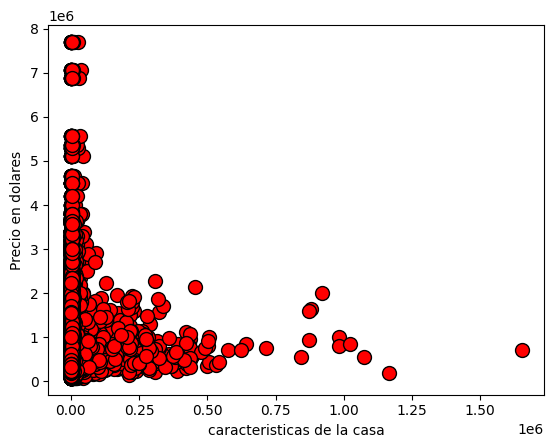

In [590]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio en dolares')
    pyplot.xlabel('caracteristicas de la casa')
  
plotData(X, y)

1.2 Descenso por el gradiente
1.2.1 Ecuaciones de actualización
El objetivo de la regresion lineal es minimizar la funcion de costo

J(θ)=12m∑i=1m(hθ(x(i))−y(i))2 

donde la hipotesis  hθ(x)  esta dada por el modelo lineal
hθ(x)=θTx=θ0+θ1x1 

Los parametros del modelo son los valores  θj . Estos son los valores que se ajustaran al costo minimo  J(θ) . Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
θj=θj−α1m∑i=1m(hθ(x(i))−y(i))x(i)jactualizacion simultanea θj for all j 

Con cada paso del descenso por el gradiente, los parametros  θj  son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J( θ ).

1.2.2 Implementación

In [591]:
# Normalizar las columnas de X
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar X
X_norm, mu, sigma = featureNormalize(X)

In [592]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [593]:
print(X)

[[ 1.         -0.39873715 -1.44746357 ... -0.35257175 -0.30607896
  -0.9433552 ]
 [ 1.         -0.39873715  0.1756067  ...  1.16156823 -0.74634143
  -0.43268619]
 [ 1.         -1.47395936 -1.44746357 ...  1.28353661 -0.13565477
   1.07013975]
 ...
 [ 1.         -1.47395936 -1.77207762 ...  0.24788796 -0.60432128
  -1.41025258]
 [ 1.         -0.39873715  0.50022075 ... -0.18441416  1.02891048
  -0.8412214 ]
 [ 1.         -1.47395936 -1.77207762 ...  0.24572284 -0.60432128
  -1.41025258]]


1.2.3 Cálculo del costo  J(θ)

In [594]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

1.2.4 Descenso por el gradiente
El costo  J(θ)  esta parametrizado por el vector  θ , no  X  y  y . Donde hay que minimizar el valor de  J(θ)  cambiando los valores del vector  θ . Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de  J(θ)  y verificar si estos decresen en cada paso.

**Vectores y matrices en `numpy`** - Importantes notas para implementación Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [595]:
# Descenso por el gradiente
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

Se inicializan los parametros  θ  con 0 y la taza de aprendizaje  α  con 0.01.

In [596]:
# inicializa los parametros de ajuste
theta = np.zeros(X_norm.shape[1])

# configuraciones para el descenso por el gradiente
# Configuraciones para el descenso por el gradiente
iterations = 5000
alpha = 0.001  # Reducir la tasa de aprendizaje

theta, J_history = gradientDescent(X_norm, y, theta, alpha, iterations)


In [597]:
# Verificar los valores de theta y el historial de costos
print("Valores de theta:", theta)
print("Historial de costos:", J_history[-10:])  # Mostrar los últimos 10 valores del historial de costos

Valores de theta: bedrooms         -26991.106308
bathrooms         29929.829475
sqft_living       76771.587073
sqft_lot              4.348506
floors             4354.960270
waterfront        49928.304752
view              39334.283841
condition         22677.064433
grade            100570.368938
sqft_above        71197.309832
sqft_basement     26102.500775
yr_built         -62693.441008
yr_renovated      11830.965023
lat               79996.828643
long             -22429.893707
sqft_living15     34387.540022
Name: price, dtype: float64
Historial de costos: [np.float64(166483132072.30994), np.float64(166483089391.88174), np.float64(166483046735.8015), np.float64(166483004104.05252), np.float64(166482961496.6182), np.float64(166482918913.48184), np.float64(166482876354.62683), np.float64(166482833820.03656), np.float64(166482791309.6945), np.float64(166482748823.58398)]


Se utilizan los parametros finales para grafical la linea.

In [602]:
# grafica la linea de ajuste sobre los datos
plotData(X.iloc[:, 0], y)
pyplot.plot(X.iloc[:, 0], np.dot(X_norm, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal'])
pyplot.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

Los valores finales de  θ  se utilizaran para realizar predicciones.

In [603]:
# Prediccion de precio de una casa con 1500 pies cuadrados
# Recordar que la primera columna de X es de unos
area = 1500
bedrooms = 3
area = (area - mu[0]) / sigma[0]
bedrooms = (bedrooms - mu[1]) / sigma[1]
price = np.dot([1, area, bedrooms], theta)
print("El precio de una casa de 1500 pies cuadrados y 3 habitaciones es de", price)

# Prediccion de precio de una casa con 1500 pies cuadrados
# Recordar que la primera columna de X es de unos
area = 1500
  

ValueError: shapes (18,) and (16,) not aligned: 18 (dim 0) != 16 (dim 0)

1.4 Visualizar  J(θ) 
Para comprender mejor la función de costo  J(θ) , se graficará la funcion de costo en 2 dimenciones con los valores de  θ0  y  θ1 .

El proposito de graficar el costo para observar como  J(θ)  varia con cambios en  θ0  y  θ1 . La función de costo  J(θ)  tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para  θ0  y  θ1 , en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

In [ ]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass

ValueError: shapes (21613,18) and (2,) not aligned: 18 (dim 1) != 2 (dim 0)